# Problem Definition

Human beings are able to exhibit a variety of emotions in many forms: through facial expressions, speech, text, or even body language. Machine learning algorithms of the current age of technology are very good at classifying these emotions, even with slight nuances in the difference between emotions like sadness and anger or fear and worry. Emotion detection through facial expressions is highly invested in and the best of current models are able to differentiate between even the most similar expressions with very high accuracy. 

There have also been many models that aim to perform sentiment analysis on textual data. Most of the research in this area is involved in the classification of positive and negative sentiments from text like reviews and comments, which are helpful for product analysis. In this paper, I focus on emotion detection from textual data, but expand from the identification of positive and negative sentiments, to identification of a spectrum of emotions from text. The ability to identify specific emotions from textual data can be helpful, most especially, for social media data analysis and prediction. It can also help to improve algorithms that make use of emotion detection to make predictions (e.g. Grammarly's tone identification for text improvement predictions). 

To make this model, I will compare and contrast the efficiency of models based on different machine learning algorithms using different metrics, and provide conclusions on the best performing model, as well as potential improvements to the model to increase classification accuracy.

# Pre-processing

The data I use for this model is prepared by Kaggle user [ishantjuyal](https://www.kaggle.com/ishantjuyal) (https://www.kaggle.com/datasets/ishantjuyal/emotions-in-text). It contains over 21,000 texts classified into 6 emotion classes: "happy" (renamed to "happiness" for consistency), "sadness", "anger", "love", "fear", and "surprise". 

I performed a number of preprocessing techniques on the data to convert it into a suitable format for the models to work with. First I cleaned the text data by removing stop words (short words that are not extremely relevant for the classification purposes), emails, hashtags and user tags, and punctation. After getting the final raw word data, I lemmatized the text data. This converts derivationally related words and to their base forms, thus making them easier to compare across different texts. For example, the lemmatization process converts both "crying" and "cried" to the base form "cry", so that they are categorized together when executing the model. Finally, I tokenized the text data, thus converting it into numerical format based on the individual words in the processed text. The text data has to be converted to a numerical format because the ML algorithms function only with mathematical operations on numerical data. 

# Solution Specification

I implemented a number of models for comparison. 

The first section of models are regular classification models. I used a Support Vector Classifier with an RBF kernel for classification, and then I tried transforming the input data further using dimensionality reduction (through PCA and LDA) and then applying the SVC. Finally, I implemented a Random Forest classifier on the data and computed the metrics. The Random Forest Classifier builds a number of decision trees on the data using different samples of the data, and then predicts the class of the testing data by pooling the classifications of these different decision trees. This was a new concept, so I believed it would be interesting to also explore this and compare its efficiency with the other methods I would implement. 

In the second section, I implement a neural network architecture to fit the model. In this network model, I make use of a new neural network layer: an LSTM. An LSTM, which stands for "Long short-term memory", is a neural network architecture used very largely in natural language processing. This is because LSTM's are designed to consider long-term relationships between words in language data. This allows the model to save and "remember" contextual information and dependencies across words in very long sentences, hence its name. I believe that such an architecture will prove helpful for emotion detection in text data, as some long sentences could contain contextual information about beared emotions in earlier parts of the sentences. 

# Testing and Analysis

After implementing the algorithms for each of the models, I compared the models by looking at their model accuracies and precisions from the classification. The results obtained from the model implementations showed that the neural network model performed better at classifying the data than the other less advanced models.

In the first section, the basic models performed quite poorly; the model that performed the best of them was the random forest classifier with an accuracy of 35% on the testing data. The models failed to identify many of the classes in the testing data, and classified almost all of the samples as eiter 2 ("love") or 4 ("fear"). This could be a result of the larger number of classes each model has to classify the data into (the models would probably perform better if it were postiive-negative sentiment analysis). It could also be a result of the format in which the data was preproccessed into, which might not be one suitable for the models to make inferences or identify distringuishing features for the classes. 

In the second section, the neural network model performed way better. The network had 5 layers: an embedding layer for transforming the data, the LSTM layer which does most of the classification, and 3 dense layers with different activation functions to return the model's class prediction. I fitting the model with a maximum of 10 epochs, and stopped fitting when the testing accuracy was larger than 90%.

The model was able to correctly classify the data with a bit over 90% accuracy, which is still quite impressive given the relatively small number of neural networks used. I generated a confusion matrix of the models predictions, and it was able to get most of the predictions right. It was also interesting to see how some of the false predictions the model made were between emotions that were also arguably similar. For example, the model misclassified "love" as "happiness" or ""fear" and "anger", a number of times, which suggests that the model is still, to some capacity, able to identify similarities between positive and negative emotions.

# Conclusion and Future Directions

The neural network model was the most successful model in detecting the emotions in the text data. The other algorithms might have performed poorly because of the input format of the data, or even because the parameters where not appropriately fine-tuned. Moreover, such models could perform better when combined with other algorithms and techniques. 

While the neural network model performed fairly well, it could still be improved by the refining of the current layers or the addition of more layers to the network. One possible improvement would be to use a Bi-directional LSTM (BiLSTM), which is better than a standard LSTM because it considers contextual information in long sequences both directions of flow along the text (forward and backward). Although limits to computational power have prevented me from implementing this, a study on the use of deep neural networks for detection of emotions through text made use of these BiLSTM's (Muhammad A., 2022), and the results seem to be valuable.

Finally, the algorithm could be expanded to include an even wider spectrum of emotions with more subtle nuances between them, like embarrassment, shyness, or even neutrality. Of course, with more classes for prediction, the model would have to be more detailed in extracting features from the text, and thus the layers of the neural network model, if used, would need to be better structured and fine-tuned. 

# References

- Muhammad Zubair Asghar, Adidah Lajis, Muhammad Mansoor Alam, Mohd Khairil Rahmat, Haidawati Mohamad Nasir, Hussain Ahmad, Mabrook S. Al-Rakhami, Atif Al-Amri, Fahad R. Albogamy, "A Deep Neural Network Model for the Detection and Classification of Emotions from Textual Content", Complexity, vol. 2022, Article ID 8221121, 12 pages, 2022. https://doi.org/10.1155/2022/8221121
- Ishant, J. (2021). Emotions in text. https://www.kaggle.com/datasets/ishantjuyal/emotions-in-text
- Fernanda, P. (2021). Emotion_Classification_using_LSTM. https://www.kaggle.com/code/fernandapratama/emotion-classification-using-lstm
- Rizki, R. (2021). Emotion in text Classification with LSTM. https://www.kaggle.com/code/rizkiprof/emotion-in-text-classification-with-lstm
- Prabhakaran, S. (2018, October 2). Lemmatization Approaches with Examples in Python. Machine Learning Plus. Retrieved April 22, 2022, from https://www.machinelearningplus.com/nlp/lemmatization-examples-python/

# Appendices

##  Importing Libraries and Installing Packages

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Libraries for preprocessing text
import nltk
from nltk.corpus import words, stopwords, wordnet
from nltk.stem import WordNetLemmatizer
import re
import string
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Libraries for implementing ML algorithms
from sklearn import decomposition
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import tensorflow as tf

# Libraries for metrics on training and testing data
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
nltk.download('stopwords')
nltk.download('words')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jesse\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\jesse\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jesse\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jesse\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\jesse\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

## Importing and pre-processing data

In [3]:
df = pd.read_csv('Emotion_final.csv')
df

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
21454,Melissa stared at her friend in dism,fear
21455,Successive state elections have seen the gover...,fear
21456,Vincent was irritated but not dismay,fear
21457,Kendall-Hume turned back to face the dismayed ...,fear


In [4]:
lemmatizer = WordNetLemmatizer()
stop_words = stopwords.words("english")

# Function to clean the text data
def clean(text):
    # Remove all the urls, user tags, hashtags, and html tages  
    text = re.sub(r'http\S+', " ", text)    
    text = re.sub(r'@\w+',' ',text)         
    text = re.sub(r'#\w+', ' ', text)       
    text = re.sub('r<.*?>',' ', text)       
    
    # remove stopwords 
    text = text.split()
    text = " ".join([word for word in text if not word in stop_words])

    # Remove punctioations from the text
    for punc in string.punctuation:
        text = text.replace(punc, "")
    
    return text

# Obtain the appropriate "Part-Of-Speech" tag for each word for appropriate lemmatization
# Code snippet from https://www.machinelearningplus.com/nlp/lemmatization-examples-python/
tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    return tag_dict.get(tag, wordnet.NOUN)

# Lemmatize the text by converting the words to their base form: e.g. "deployment" and "deployed" will both be converted to "deploy"
def lemmatize(text):
    new_text = []
    tokenization = nltk.word_tokenize(text)
    for w in tokenization:
        tmp_w = lemmatizer.lemmatize(w, get_wordnet_pos(w))
        if tmp_w is None:
            new_text.append(w)
        else:
            new_text.append(tmp_w)
    return " ".join(new_text)

def preprocess_input(string):
    string = clean(string)
    string = lemmatize(string)
    return string
    
df['Text'] = df['Text'].apply(lambda x: preprocess_input(x))
df.head()

,Text,Emotion
0,didnt feel humiliate,sadness
1,go feel hopeless damn hopeful around someone c...,sadness
2,im grab minute post feel greedy wrong,anger
3,ever feel nostalgic fireplace know still property,love
4,feel grouchy,anger


In [5]:
# Extract the different class labels from the data and vectorize the labels using get_dummies
encoder = LabelEncoder()
category = pd.get_dummies(df.Emotion)
df_new = pd.concat([df, category], axis=1)
df_new['Label'] = encoder.fit_transform(df['Emotion'])
df_new.rename(columns={"happy":"happiness"}, inplace=True)
df_new

,Text,Emotion,anger,fear,happiness,love,sadness,surprise,Label
0,didnt feel humiliate,sadness,0,0,0,0,1,0,4
1,go feel hopeless damn hopeful around someone c...,sadness,0,0,0,0,1,0,4
2,im grab minute post feel greedy wrong,anger,1,0,0,0,0,0,0
3,ever feel nostalgic fireplace know still property,love,0,0,0,1,0,0,3
4,feel grouchy,anger,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
21454,Melissa star friend dism,fear,0,1,0,0,0,0,1
21455,Successive state election see govern party pum...,fear,0,1,0,0,0,0,1
21456,Vincent irritated dismay,fear,0,1,0,0,0,0,1
21457,KendallHume turn back face dismayed coup,fear,0,1,0,0,0,0,1


In [35]:
# Obtain each of the classes in the data
# There are 6 classes: sadness, anger, love, surprise, fear, and happiness
classes = df.Emotion.unique()
classes[classes == 'happy'] = 'happiness'
print(classes)

['sadness' 'anger' 'love' 'surprise' 'fear' 'happiness']


In [36]:
X = df_new['Text'].values
labels = df_new['Label'].values

In [8]:
# Tokenizer function for converting the textual data to numerical data for the models to work with
def tokenizer(text):
    tokenizer = Tokenizer(num_words=2000, oov_token='x')
    tokenizer.fit_on_texts(text)
    sequence = tokenizer.texts_to_sequences(text)
    padded = pad_sequences(sequence) 

    return padded

padded_X = tokenizer(X)

In [56]:
# Splitting data in to an 80-20 train-test split to avoid overfitting and maximize accuracy on the testing data
X_train, X_test, Y_train, Y_test = train_test_split(padded_X, labels, test_size=0.2, random_state=42)

## SVC with RBF Kernel 

In [50]:
#SVM classifier with rbf kernel
rbf_svc = SVC(C = 1, kernel="rbf")
rbf_svc.fit(X_train, Y_train)

predictions = rbf_svc.predict(X_test)
print("SVM with RBF Kernel Classification Report")
print(classification_report(Y_test, predictions, zero_division=0))

SVM with RBF Kernel Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       617
           1       0.00      0.00      0.00       531
           2       0.33      0.76      0.46      1381
           3       0.00      0.00      0.00       318
           4       0.35      0.31      0.33      1277
           5       0.00      0.00      0.00       168

    accuracy                           0.34      4292
   macro avg       0.11      0.18      0.13      4292
weighted avg       0.21      0.34      0.25      4292



## Principal Component Analysis with SVC

In [57]:
pca = decomposition.PCA(n_components=0.9)
pca.fit(X_train)

clf_PCA = SVC(C = 1, kernel="rbf")
PCA_X_train = pca.transform(X_train)
PCA_X_test = pca.transform(X_test)
clf_PCA.fit(PCA_X_train, Y_train)

PCA_predictions = clf_PCA.predict(PCA_X_test)
print("Classification Report on Testing Data")
print(classification_report(Y_test, PCA_predictions, zero_division=0))

Classification Report on Testing Data
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       617
           1       0.00      0.00      0.00       531
           2       0.33      0.75      0.46      1381
           3       0.00      0.00      0.00       318
           4       0.34      0.31      0.32      1277
           5       0.00      0.00      0.00       168

    accuracy                           0.33      4292
   macro avg       0.11      0.18      0.13      4292
weighted avg       0.21      0.33      0.24      4292



## Linear Discriminant Analysis with SVC classification

In [58]:
lda = LinearDiscriminantAnalysis(n_components=3)
lda.fit(X_train, Y_train)

LDA_X_train = lda.transform(X_train)
LDA_X_test = lda.transform(X_test)

clf_LDA = SVC(C = 1, kernel="rbf")
clf_LDA.fit(LDA_X_train, Y_train)

LDA_predictions = clf_LDA.predict(LDA_X_test)
print("Classification Report on Testing Data")
print(classification_report(Y_test, LDA_predictions, zero_division=0))

Classification Report on Testing Data
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       617
           1       0.00      0.00      0.00       531
           2       0.34      0.80      0.47      1381
           3       0.00      0.00      0.00       318
           4       0.35      0.29      0.32      1277
           5       0.00      0.00      0.00       168

    accuracy                           0.34      4292
   macro avg       0.12      0.18      0.13      4292
weighted avg       0.21      0.34      0.25      4292



## Random Forest Classification

In [59]:
clf_rfc = RandomForestClassifier()
clf_rfc.fit(X_train, Y_train)
predictions = clf_rfc.predict(X_test)
print("Classification Report on Testing Data")
print(classification_report(Y_test, predictions, zero_division=0))

Classification Report on Testing Data
              precision    recall  f1-score   support

           0       0.32      0.07      0.12       617
           1       0.30      0.07      0.12       531
           2       0.36      0.66      0.46      1381
           3       0.25      0.03      0.05       318
           4       0.35      0.40      0.37      1277
           5       0.25      0.04      0.06       168

    accuracy                           0.35      4292
   macro avg       0.31      0.21      0.20      4292
weighted avg       0.33      0.35      0.30      4292



# Neural Network Model (Using LSTM)

In [103]:
Y = df_new[classes].values

# Splitting the data into an 80-20 train-test split (to avoid overfitting on the training data by maximizing accuracy on the testing data)
X_train, X_test, Y_train, Y_test = train_test_split(padded_X, Y, test_size=0.2, random_state=42)

In [106]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=2000, output_dim=16),
    tf.keras.layers.LSTM(64),
    # A potential improvement would be to use a bi-directional LSTM layer instead of a unidirectional one
    # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True, recurrent_dropout=0.4)),
    # tf.keras.layers.GlobalAveragePooling1D(),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [107]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, None, 16)          32000     
                                                                 
 lstm_12 (LSTM)              (None, 64)                20736     
                                                                 
 dense_36 (Dense)            (None, 128)               8320      
                                                                 
 dense_37 (Dense)            (None, 64)                8256      
                                                                 
 dense_38 (Dense)            (None, 6)                 390       
                                                                 
Total params: 69,702
Trainable params: 69,702
Non-trainable params: 0
_________________________________________________________________


In [108]:
class Callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    # Stop the model training once the testing accuracy is greater than 90% 
    if (logs.get('val_accuracy') > 0.90):
      print("\nAccuracy on testing data > 90%!")
      self.model.stop_training = True
callbacks = Callback()

In [109]:
num_epochs = 10
history = model.fit(X_train, Y_train, epochs=num_epochs, batch_size=16, validation_data=(X_test, Y_test), verbose=1, callbacks=[callbacks])

Epoch 1/10
1073/1073 [==============================] - 22s 18ms/step - loss: 1.0894 - accuracy: 0.5656 - val_loss: 0.5508 - val_accuracy: 0.8006
Epoch 2/10
1073/1073 [==============================] - 19s 18ms/step - loss: 0.4174 - accuracy: 0.8507 - val_loss: 0.3573 - val_accuracy: 0.8747
Epoch 3/10
1073/1073 [==============================] - 24s 22ms/step - loss: 0.2780 - accuracy: 0.8987 - val_loss: 0.3267 - val_accuracy: 0.8814
Epoch 4/10
1072/1073 [============================>.] - ETA: 0s - loss: 0.2207 - accuracy: 0.9201
Accuracy on testing data > 90%!
1073/1073 [==============================] - 24s 22ms/step - loss: 0.2207 - accuracy: 0.9201 - val_loss: 0.2744 - val_accuracy: 0.9021


In [110]:
ce_score, accuracy = model.evaluate(X_test, Y_test)
print('Accuracy of neural network model on testing data =', accuracy)
print('Cross entropy score (Loss) =', ce_score)

135/135 [==============================] - 1s 9ms/step - loss: 0.2744 - accuracy: 0.9021
Accuracy of neural network model on testing data = 0.9021435379981995
Cross entropy score (Loss) = 0.2744296193122864


In [111]:
predictions = model.predict(X_test)

prediction = []
for pred in predictions:
    index = np.argmax(pred)
    prediction.append(index)
prediction = np.array(prediction).flatten()

Y_test_classes = []
for classif in Y_test:
    Y_test_classes.append(np.argwhere(classif))
Y_test_classes = np.array(Y_test_classes).flatten()

print(classification_report(Y_test_classes, prediction))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1277
           1       0.89      0.90      0.90       617
           2       0.77      0.82      0.79       318
           3       0.75      0.73      0.74       168
           4       0.88      0.86      0.87       531
           5       0.93      0.92      0.92      1381

    accuracy                           0.90      4292
   macro avg       0.86      0.86      0.86      4292
weighted avg       0.90      0.90      0.90      4292



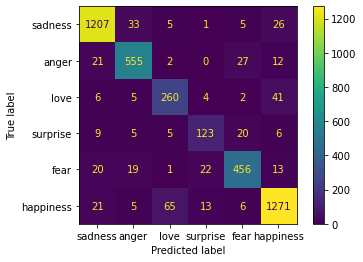

In [112]:
cm = confusion_matrix(Y_test_classes, prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot()
plt.show()

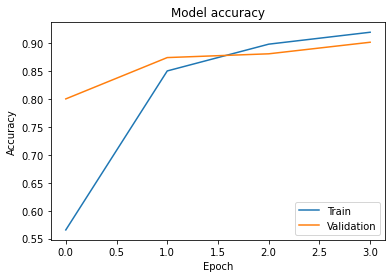

In [113]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

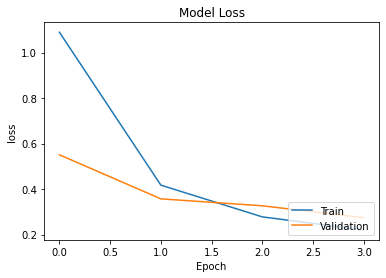

In [114]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()